In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("bank.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [3]:
df.shape


(11162, 17)

In [4]:
df.index


RangeIndex(start=0, stop=11162, step=1)

In [5]:
df.columns


Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [6]:
df.isnull().sum()


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

There are no missing values in the dataset 

{'whiskers': [<matplotlib.lines.Line2D at 0x1e8786c8a90>,
 'caps': [<matplotlib.lines.Line2D at 0x1e8786c8eb8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e8786c8668>],
 'medians': [<matplotlib.lines.Line2D at 0x1e8786ee7f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e8786eeb38>],
 'means': []}

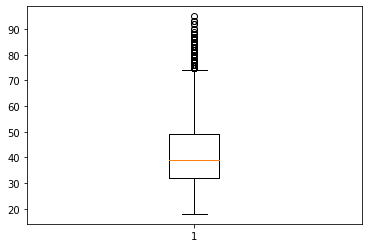

In [7]:
plt.boxplot(df.age)


{'whiskers': [<matplotlib.lines.Line2D at 0x1e8787914a8>,
 'caps': [<matplotlib.lines.Line2D at 0x1e878791b38>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e8787910b8>],
 'medians': [<matplotlib.lines.Line2D at 0x1e878791f60>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e87879f550>],
 'means': []}

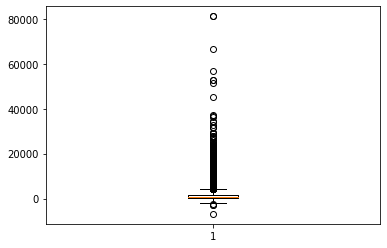

In [8]:
plt.boxplot(df.balance)

{'whiskers': [<matplotlib.lines.Line2D at 0x1e8787f1a20>,
 'caps': [<matplotlib.lines.Line2D at 0x1e8787f1e80>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e8787f1630>],
 'medians': [<matplotlib.lines.Line2D at 0x1e8787fd7b8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e8787fdb00>],
 'means': []}

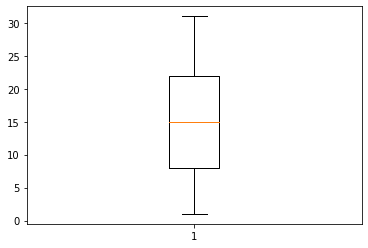

In [9]:
plt.boxplot(df.day)


{'whiskers': [<matplotlib.lines.Line2D at 0x1e878855e10>,
 'caps': [<matplotlib.lines.Line2D at 0x1e8788667f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e878855cc0>],
 'medians': [<matplotlib.lines.Line2D at 0x1e878866e80>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e878866f60>],
 'means': []}

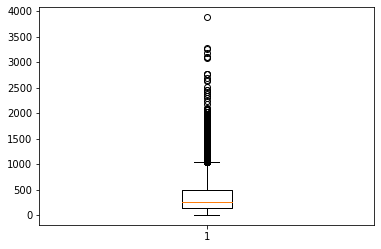

In [10]:
plt.boxplot(df.duration)

{'whiskers': [<matplotlib.lines.Line2D at 0x1e8788c5ef0>,
 'caps': [<matplotlib.lines.Line2D at 0x1e8788d25f8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e8788c5b00>],
 'medians': [<matplotlib.lines.Line2D at 0x1e8788d2c88>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e8788d2fd0>],
 'means': []}

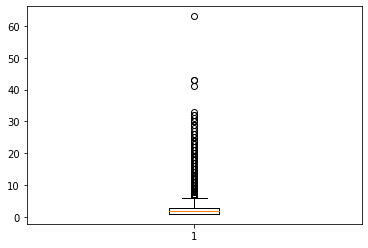

In [11]:
plt.boxplot(df.campaign)

{'whiskers': [<matplotlib.lines.Line2D at 0x1e878928eb8>,
 'caps': [<matplotlib.lines.Line2D at 0x1e878935860>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e878928d68>],
 'medians': [<matplotlib.lines.Line2D at 0x1e878935ef0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e878935fd0>],
 'means': []}

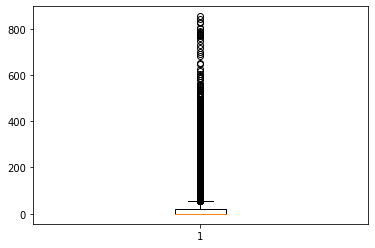

In [12]:
plt.boxplot(df.pdays)

{'whiskers': [<matplotlib.lines.Line2D at 0x1e87898f9b0>,
 'caps': [<matplotlib.lines.Line2D at 0x1e87898fe48>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e87898f5c0>],
 'medians': [<matplotlib.lines.Line2D at 0x1e87899a780>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e87899aac8>],
 'means': []}

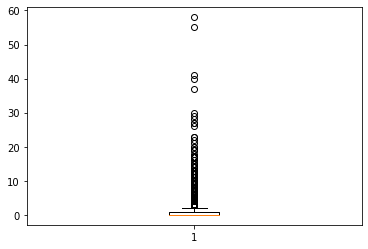

In [13]:
plt.boxplot(df.previous)

In [14]:
inputs=df
df=pd.DataFrame(inputs)
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

filter = (df['age'] >= Q1 - 1.5 * IQR) & (df['age'] <= Q3 + 1.5 *IQR)
df=df.loc[filter] 
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [15]:
Q1 = df['balance'].quantile(0.25)
Q3 = df['balance'].quantile(0.75)
IQR = Q3 - Q1

filter = (df['balance'] >= Q1 - 1.5 * IQR) & (df['balance'] <= Q3 + 1.5 *IQR)
df=df.loc[filter]
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [16]:
Q1 = df['duration'].quantile(0.25)
Q3 = df['duration'].quantile(0.75)
IQR = Q3 - Q1

filter = (df['duration'] >= Q1 - 1.5 * IQR) & (df['duration'] <= Q3 + 1.5 *IQR)
df=df.loc[filter] 
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
10,38,admin.,single,secondary,no,100,yes,no,unknown,7,may,786,1,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [17]:
Q1 = df['campaign'].quantile(0.25)
Q3 = df['campaign'].quantile(0.75)
IQR = Q3 - Q1

filter = (df['campaign'] >= Q1 - 1.5 * IQR) & (df['campaign'] <= Q3 + 1.5 *IQR)
df=df.loc[filter] 
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
10,38,admin.,single,secondary,no,100,yes,no,unknown,7,may,786,1,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [18]:
Q1 = df['pdays'].quantile(0.25)
Q3 = df['pdays'].quantile(0.75)
IQR = Q3 - Q1

filter = (df['pdays'] >= Q1 - 1.5 * IQR) & (df['pdays'] <= Q3 + 1.5 *IQR)
df=df.loc[filter] 
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
10,38,admin.,single,secondary,no,100,yes,no,unknown,7,may,786,1,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [19]:
Q1 = df['previous'].quantile(0.25)
Q3 = df['previous'].quantile(0.75)
IQR = Q3 - Q1

filter = (df['previous'] >= Q1 - 1.5 * IQR) & (df['previous'] <= Q3 + 1.5 *IQR)
df=df.loc[filter] 
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
10,38,admin.,single,secondary,no,100,yes,no,unknown,7,may,786,1,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11156,34,blue-collar,single,secondary,no,-72,yes,no,cellular,7,jul,273,5,-1,0,unknown,no
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no


In [20]:
inputs = df

In [21]:
from sklearn.preprocessing import LabelEncoder
le_age = LabelEncoder()
le_job = LabelEncoder()
le_marital = LabelEncoder()
le_education = LabelEncoder()
le_default=LabelEncoder()
le_balance = LabelEncoder()
le_housing= LabelEncoder()
le_loan= LabelEncoder()
le_contact= LabelEncoder()
le_day= LabelEncoder()
le_month= LabelEncoder()
le_duration = LabelEncoder()
le_campaign = LabelEncoder()
le_pdays = LabelEncoder()
le_previous = LabelEncoder()
le_poutcome= LabelEncoder()
le_deposit=LabelEncoder()

In [22]:
inputs['age_n'] = le_age.fit_transform(inputs['age'])
inputs['job_n'] = le_job.fit_transform(inputs['job'])
inputs['marital_n'] = le_job.fit_transform(inputs['marital'])
inputs['education_n'] = le_job.fit_transform(inputs['education'])
inputs['default_n'] = le_default.fit_transform(inputs['default'])
inputs['balance_n'] = le_balance.fit_transform(inputs['balance'])
inputs['housing_n'] = le_housing.fit_transform(inputs['housing'])
inputs['loan_n'] = le_loan.fit_transform(inputs['loan'])
inputs['contact_n'] = le_job.fit_transform(inputs['contact'])
inputs['day_n'] = le_job.fit_transform(inputs['day'])
inputs['month_n'] = le_job.fit_transform(inputs['month'])
inputs['duration_n'] = le_duration.fit_transform(inputs['duration'])
inputs['campaign_n'] = le_campaign.fit_transform(inputs['campaign'])
inputs['pdays_n'] = le_pdays.fit_transform(inputs['pdays'])
inputs['previous_n'] = le_previous.fit_transform(inputs['previous'])
inputs['poutcome_n'] = le_poutcome.fit_transform(inputs['poutcome'])
inputs['deposit_n']=le_deposit.fit_transform(inputs['deposit'])

In [23]:
inputs

,age,job,marital,education,default,balance,housing,loan,contact,day,...,loan_n,contact_n,day_n,month_n,duration_n,campaign_n,pdays_n,previous_n,poutcome_n,deposit_n
3,55,services,married,secondary,no,2476,yes,no,unknown,5,...,0,2,4,8,574,0,0,0,0,1
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,...,0,2,4,8,666,1,0,0,0,1
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,...,1,2,4,8,557,1,0,0,0,1
8,37,technician,married,secondary,no,1,yes,no,unknown,6,...,0,2,5,8,602,0,0,0,0,1
10,38,admin.,single,secondary,no,100,yes,no,unknown,7,...,0,2,6,8,771,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11156,34,blue-collar,single,secondary,no,-72,yes,no,cellular,7,...,0,0,6,5,270,4,0,0,0,0
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,...,0,0,19,0,254,0,0,0,0,0
11158,39,services,married,secondary,no,733,no,no,unknown,16,...,0,2,15,6,80,3,0,0,0,0
11159,32,technician,single,secondary,no,29,no,no,cellular,19,...,0,0,18,1,153,1,0,0,0,0


In [24]:
inputs_n = inputs.drop(['age','job','marital','education','default','balance','housing','loan','contact','day','month','duration','campaign','pdays','previous','poutcome','deposit'],axis='columns')

In [25]:
inputs_n

,age_n,job_n,marital_n,education_n,default_n,balance_n,housing_n,loan_n,contact_n,day_n,month_n,duration_n,campaign_n,pdays_n,previous_n,poutcome_n,deposit_n
3,37,7,1,1,0,2083,1,0,2,4,8,574,0,0,0,0,1
4,36,0,1,2,0,540,0,0,2,4,8,666,1,0,0,0,1
5,24,4,2,2,0,356,1,1,2,4,8,557,1,0,0,0,1
8,19,9,1,1,0,357,1,0,2,5,8,602,0,0,0,0,1
10,20,0,2,1,0,456,1,0,2,6,8,771,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11156,16,1,2,1,0,297,1,0,0,6,5,270,4,0,0,0,0
11157,15,1,2,0,0,357,1,0,0,19,0,254,0,0,0,0,0
11158,21,7,1,1,0,1067,0,0,2,15,6,80,3,0,0,0,0
11159,14,9,2,1,0,385,0,0,0,18,1,153,1,0,0,0,0


In [26]:
inputs_n1=inputs_n.drop('deposit_n',axis='columns')
inputs_n1

,age_n,job_n,marital_n,education_n,default_n,balance_n,housing_n,loan_n,contact_n,day_n,month_n,duration_n,campaign_n,pdays_n,previous_n,poutcome_n
3,37,7,1,1,0,2083,1,0,2,4,8,574,0,0,0,0
4,36,0,1,2,0,540,0,0,2,4,8,666,1,0,0,0
5,24,4,2,2,0,356,1,1,2,4,8,557,1,0,0,0
8,19,9,1,1,0,357,1,0,2,5,8,602,0,0,0,0
10,20,0,2,1,0,456,1,0,2,6,8,771,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11156,16,1,2,1,0,297,1,0,0,6,5,270,4,0,0,0
11157,15,1,2,0,0,357,1,0,0,19,0,254,0,0,0,0
11158,21,7,1,1,0,1067,0,0,2,15,6,80,3,0,0,0
11159,14,9,2,1,0,385,0,0,0,18,1,153,1,0,0,0


In [27]:
target=inputs_n['deposit_n']

In [28]:
target

3        1
4        1
5        1
8        1
10       1
        ..
11156    0
11157    0
11158    0
11159    0
11161    0
Name: deposit_n, Length: 6498, dtype: int32

In [29]:
from sklearn import tree
var_train, var_test, res_train, res_test = train_test_split(inputs_n1, target, test_size = 0.3)

In [30]:
decision_tree = tree.DecisionTreeClassifier()
decision_tree = decision_tree.fit(var_train, res_train)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

res_pred = decision_tree.predict(var_test)
score = accuracy_score(res_test, res_pred)
score

0.7615384615384615

In [31]:
df=pd.DataFrame(var_train)
y=res_train

In [32]:
from sklearn import tree
model = tree.DecisionTreeClassifier(max_depth=7)
model.fit(df,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

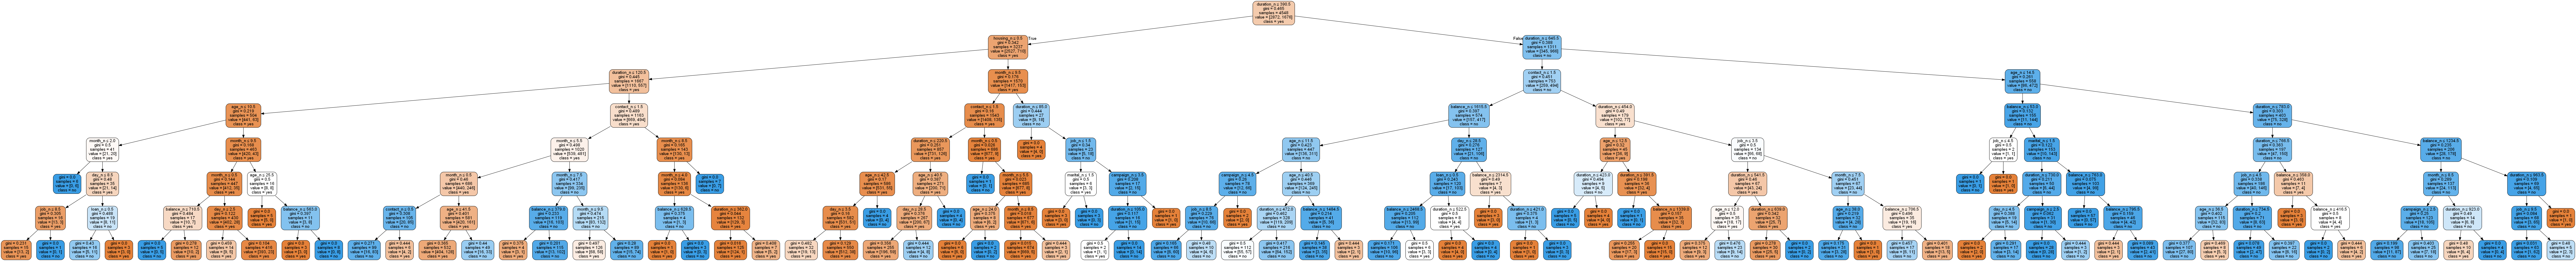

In [33]:
data_fnames=['age_n','job_n','marital_n','education_n','default_n','balance_n','housing_n','loan_n','contact_n','day_n','month_n','duration_n','campaign_n','pdays_n','previous_n','poutcome_n']
c_names=['yes','no']
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names=data_fnames,class_names=c_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

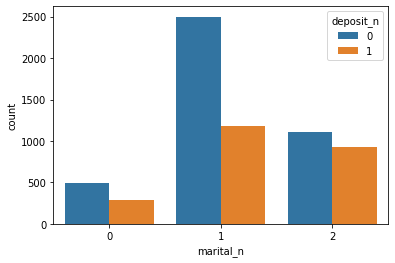

In [34]:
sns.countplot(x="marital_n",hue='deposit_n',data=inputs_n)

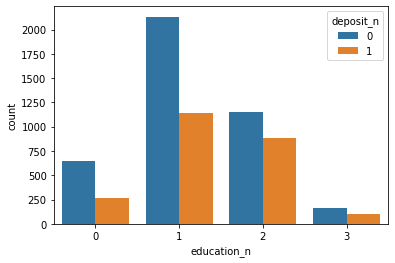

In [35]:
sns.countplot(x="education_n",hue='deposit_n',data=inputs_n)

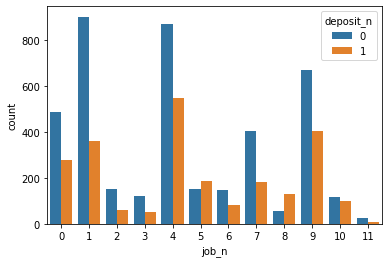

In [36]:
sns.countplot(x="job_n",hue='deposit_n',data=inputs_n)

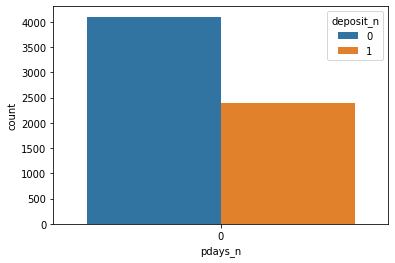

In [37]:
sns.countplot(x="pdays_n",hue='deposit_n',data=inputs_n)

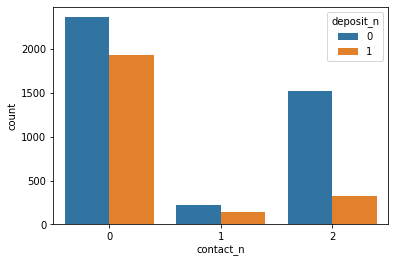

In [38]:
sns.countplot(x="contact_n",hue='deposit_n',data=inputs_n)

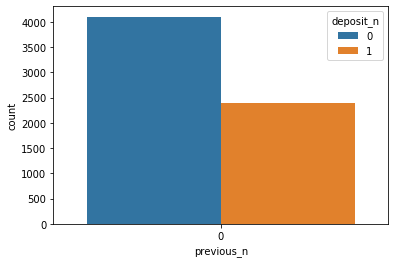

In [39]:
sns.countplot(x="previous_n",hue='deposit_n',data=inputs_n)

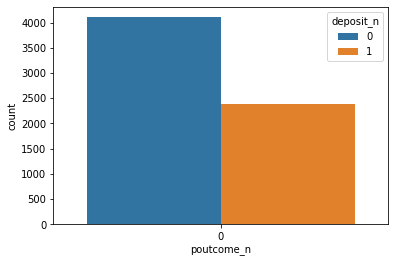

In [40]:
sns.countplot(x="poutcome_n",hue='deposit_n',data=inputs_n)

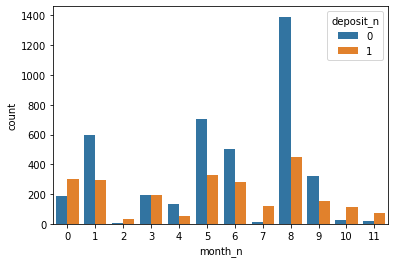

In [41]:
sns.countplot(x="month_n",hue='deposit_n',data=inputs_n)

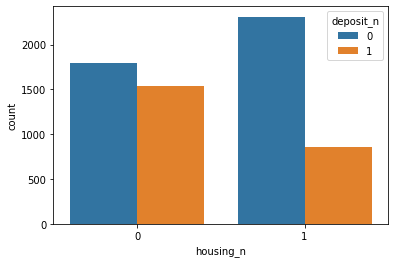

In [42]:
sns.countplot(x="housing_n",hue='deposit_n',data=inputs_n)

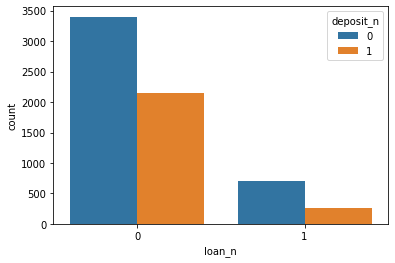

In [43]:
sns.countplot(x="loan_n",hue='deposit_n',data=inputs_n)

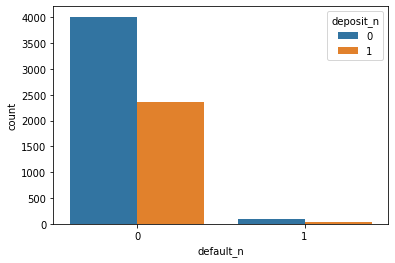

In [44]:
sns.countplot(x="default_n",hue='deposit_n',data=inputs_n)

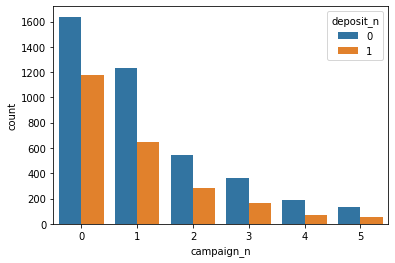

In [45]:
sns.countplot(x="campaign_n",hue='deposit_n',data=inputs_n)

In [46]:
inputs_n1=inputs_n1.drop(['previous_n','pdays_n','poutcome_n'],axis='columns')

In [47]:
df_for_correlation = pd.DataFrame(inputs_n1)
df_for_correlation.columns = ['age_n','job_n','marital_n','education_n','default_n','balance_n','housing_n','loan_n','contact_n','day_n','month_n','duration_n','campaign_n']
corr_matrix = df_for_correlation.corr()
corr_matrix

,age_n,job_n,marital_n,education_n,default_n,balance_n,housing_n,loan_n,contact_n,day_n,month_n,duration_n,campaign_n
age_n,1.000000,-0.039855,-0.441590,-0.119086,-0.003002,0.082003,-0.153632,-0.010656,0.023377,-0.004257,-0.056418,-0.019340,0.030611
job_n,-0.039855,1.000000,0.071613,0.159730,-0.012624,0.038547,-0.129950,-0.062451,-0.095664,0.018488,-0.095020,0.017550,0.018344
marital_n,-0.441590,0.071613,1.000000,0.122022,-0.006380,0.032546,-0.025856,-0.064497,-0.054443,-0.004852,-0.000028,0.025428,-0.054931
education_n,-0.119086,0.159730,0.122022,1.000000,-0.014837,0.064045,-0.107332,-0.074774,-0.137565,0.024749,-0.067669,-0.008892,-0.005051
default_n,-0.003002,-0.012624,-0.006380,-0.014837,1.000000,-0.133386,-0.000714,0.077203,0.028488,0.015507,0.012782,0.018360,0.012304
balance_n,0.082003,0.038547,0.032546,0.064045,-0.133386,1.000000,-0.075097,-0.108867,-0.043512,-0.008359,-0.012304,0.042305,-0.024138
housing_n,-0.153632,-0.129950,-0.025856,-0.107332,-0.000714,-0.075097,1.000000,0.037731,0.281047,0.002660,0.316082,0.011269,-0.028844
loan_n,-0.010656,-0.062451,-0.064497,-0.074774,0.077203,-0.108867,0.037731,1.000000,-0.016025,0.015297,0.032475,-0.013316,0.001319
contact_n,0.023377,-0.095664,-0.054443,-0.137565,0.028488,-0.043512,0.281047,-0.016025,1.000000,-0.006885,0.388490,-0.074826,-0.024017
day_n,-0.004257,0.018488,-0.004852,0.024749,0.015507,-0.008359,0.002660,0.015297,-0.006885,1.000000,-0.013423,-0.024142,0.098895


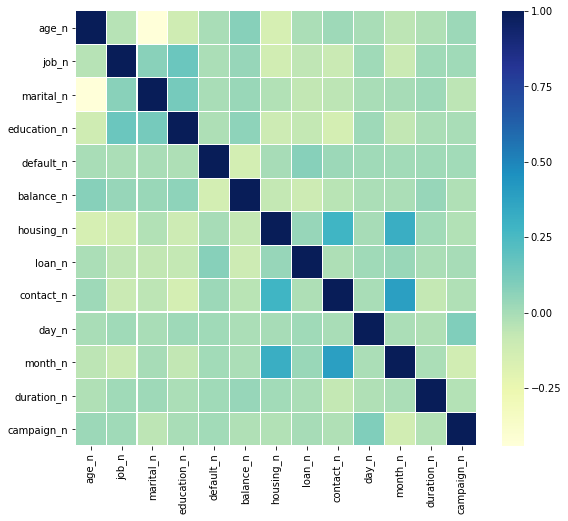

In [48]:
fig, ax = plt.subplots(figsize = (9,8))
sns.heatmap(corr_matrix, ax=ax, cmap='YlGnBu', linewidths=0.1)

Variance per component:  [8.80580270e-01 1.18971731e-01 2.45541532e-04 1.52260193e-04
 2.38825168e-05 1.88245100e-05 3.51491874e-06 1.48746651e-06
 1.08195639e-06 6.75196779e-07 4.28502980e-07 2.60167747e-07
 4.20420324e-08] 

Variance per component:  [8.80580270e-01 1.18971731e-01 2.45541532e-04 1.52260193e-04
 2.38825168e-05 1.88245100e-05 3.51491874e-06 1.48746651e-06
 1.08195639e-06 6.75196779e-07 4.28502980e-07 2.60167747e-07] 

[[ 1.13114819e+03  2.45496959e+02  1.34934878e+01 ... -7.21266201e-02
   3.97092256e-01 -4.12946400e-02]
 [-4.09947257e+02  3.65249718e+02  1.48318167e+01 ... -2.45887119e-01
  -6.48096841e-01 -9.70517702e-02]
 [-5.95894779e+02  2.59592577e+02  2.89188451e+00 ... -7.05083666e-01
   4.16619228e-01  9.25912914e-01]
 ...
 [ 1.06399733e+02 -2.30130804e+02 -1.63984625e+00 ...  8.55566880e-04
  -6.90471798e-01 -1.09010675e-01]
 [-5.74184299e+02 -1.44862189e+02 -7.62041569e+00 ... -6.63490082e-01
  -1.75376510e-01 -1.25204423e-01]
 [-5.94735004e+02  3.24589268e+0

{'whiskers': [<matplotlib.lines.Line2D at 0x1e87aa8f0b8>,
 'caps': [<matplotlib.lines.Line2D at 0x1e87aa5d6a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e87aa8f4a8>,
 'medians': [<matplotlib.lines.Line2D at 0x1e87aa5dd30>,
 'fliers': [<matplotlib.lines.Line2D at 0x1e87aa5de10>,
 'means': []}

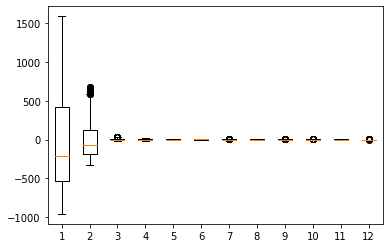

In [49]:
from sklearn.decomposition import PCA
pca = PCA(n_components=13)
pca.fit(inputs_n1)

print("Variance per component: ", pca.explained_variance_ratio_, "\n")

pca = PCA(n_components=12)
X_pca = pca.fit_transform(inputs_n1)

print("Variance per component: ", pca.explained_variance_ratio_, "\n")
print(X_pca)
plt.boxplot(X_pca)

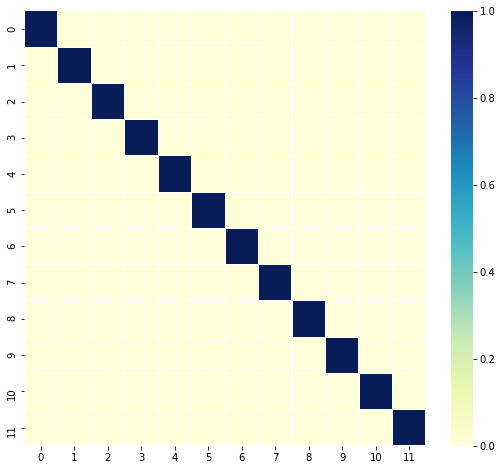

In [50]:
df_pca_corr = pd.DataFrame(X_pca)
corr_post_pca = df_pca_corr.corr()

fig, ax = plt.subplots(figsize = (9, 8))
sns.heatmap(corr_post_pca, ax=ax, cmap='YlGnBu', linewidths=0.1)

In [51]:
from sklearn import tree
var_train, var_test, res_train, res_test = train_test_split(X_pca, target, test_size = 0.2)

decision_tree = tree.DecisionTreeClassifier()
decision_tree = decision_tree.fit(var_train, res_train)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

res_pred = decision_tree.predict(var_test)
score = accuracy_score(res_test, res_pred)
score

0.7553846153846154